In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('housing.csv')

In [3]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
dataset.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [5]:
dataset.get_dtype_counts()

float64    4
int64      5
object     1
dtype: int64

In [6]:
X = dataset.iloc[:,:-1].values

In [7]:
y = dataset.iloc[:,9].values

In [8]:
from sklearn.preprocessing import Imputer

In [9]:
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer = imputer.fit(X[:,1:8])
X[:,1:8] = imputer.transform(X[:,1:8])

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
labelencoder_X = LabelEncoder()

In [12]:
X[:,8] = labelencoder_X.fit_transform(X[:,8])
onehotencoder = OneHotEncoder(categorical_features=[0])

In [13]:
from sklearn.cross_validation import train_test_split

C:\Users\armando_galeana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

C:\Users\armando_galeana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))
y_test = sc_y.fit_transform(y_test.reshape(-1,1))

C:\Users\armando_galeana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [19]:
LinReg = LinearRegression()
DecTree = DecisionTreeRegressor()
RanForest = RandomForestRegressor(n_estimators=5, random_state=0)

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
LinReg = LinReg.fit(X_train, y_train)
pred_probs_LinReg = LinReg.predict(X_test)
print('Mean square error: %f' % mean_squared_error(y_test, pred_probs_LinReg))

Mean square error: 0.371275


In [22]:
DecTree = DecTree.fit(X_train, y_train)
pred_probs_DecTree = DecTree.predict(X_test)
print('Mean square error: %f' % mean_squared_error(y_test, pred_probs_DecTree))

Mean square error: 0.377566


In [23]:
RanForest = RanForest.fit(X_train, y_train)
pred_probs_RanForest = RanForest.predict(X_test)
print('Mean square error: %f' % mean_squared_error(y_test, pred_probs_RanForest))

C:\Users\armando_galeana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Mean square error: 0.239933


In [24]:
print ('LR Mean squared error: %f' % mean_squared_error(y_test,pred_probs_LinReg))
print ('DT Mean squared error: %f' % mean_squared_error(y_test,pred_probs_DecTree))
print ('RF Mean squared error: %f' % mean_squared_error(y_test,pred_probs_RanForest))

LR Mean squared error: 0.371275
DT Mean squared error: 0.377566
RF Mean squared error: 0.239933


In [25]:
from math import sqrt

In [26]:
rmse = sqrt(mean_squared_error(y_test, pred_probs_RanForest))

In [27]:
rmse

0.4898297084099241

In [32]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [37]:
corrmat = dataset.corr()
corrmat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [36]:
print (corrmat)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

In [40]:
k = 4
cols = corrmat.nlargest(k,'median_house_value')['median_house_value'].index

In [41]:
cols

Index(['median_house_value', 'median_income', 'total_rooms',
       'housing_median_age'],
      dtype='object')

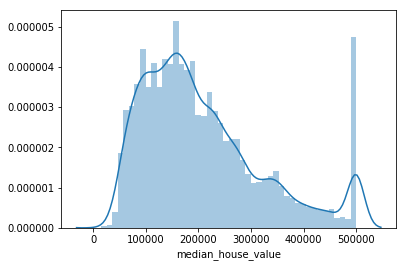

In [42]:
sns.distplot(dataset['median_house_value'])

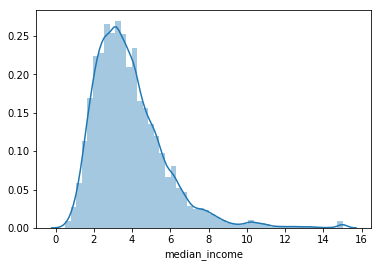

In [43]:
sns.distplot(dataset['median_income'])

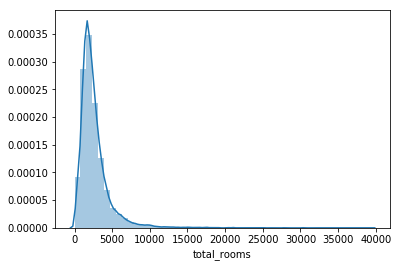

In [44]:
sns.distplot(dataset['total_rooms'])

In [45]:
scatter1 = pd.concat([dataset['median_house_value'],dataset['median_income']], axis =1)

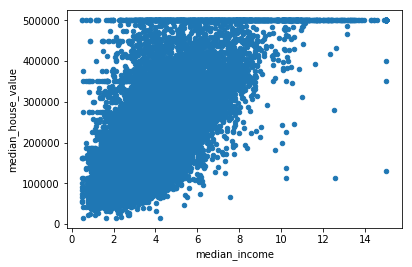

In [47]:
scatter1.plot.scatter(x='median_income', y='median_house_value')

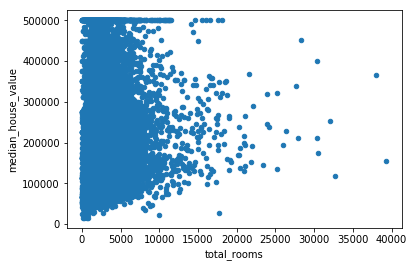

In [48]:
scatter2 = pd.concat([dataset['median_house_value'],dataset['total_rooms']], axis =1)
scatter2.plot.scatter(x='total_rooms', y='median_house_value')